<a href="https://colab.research.google.com/github/Harin22/hands-on-ml-with-scikit-code-and-implementation/blob/main/ML_Book_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing essential libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


**Framing the Problem**

 The first question to ask your boss is what exactly is the business objective; building a
 model is probably not the end goal. How does the company expect to use and benefit
 Look at the Big Picture

A piece of information fed to a Machine Learning system is often called a signal in reference to Shannon’s
 information theory: you want a high signal/noise ratio.
 from this model? This is important because it will determine how you frame the
 problem, what algorithms you will select, what performance measure you will use to
 evaluate your model, and how much effort you should spend tweaking it

**First, we need to frame the problem: is it supervised, unsupervised, or Reinforce
ment Learning? Is it a classification task, a regression task, or something else? Should
 you use batch learning or online learning techniques? Before you read on, pause and
 try to answer these questions for ourself**

In [3]:
import pandas as pd

hd = pd.read_csv("housing.csv") #reading data
display(hd.head())
display(hd.info())
display(hd.describe())

hd['ocean_proximity'].value_counts()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


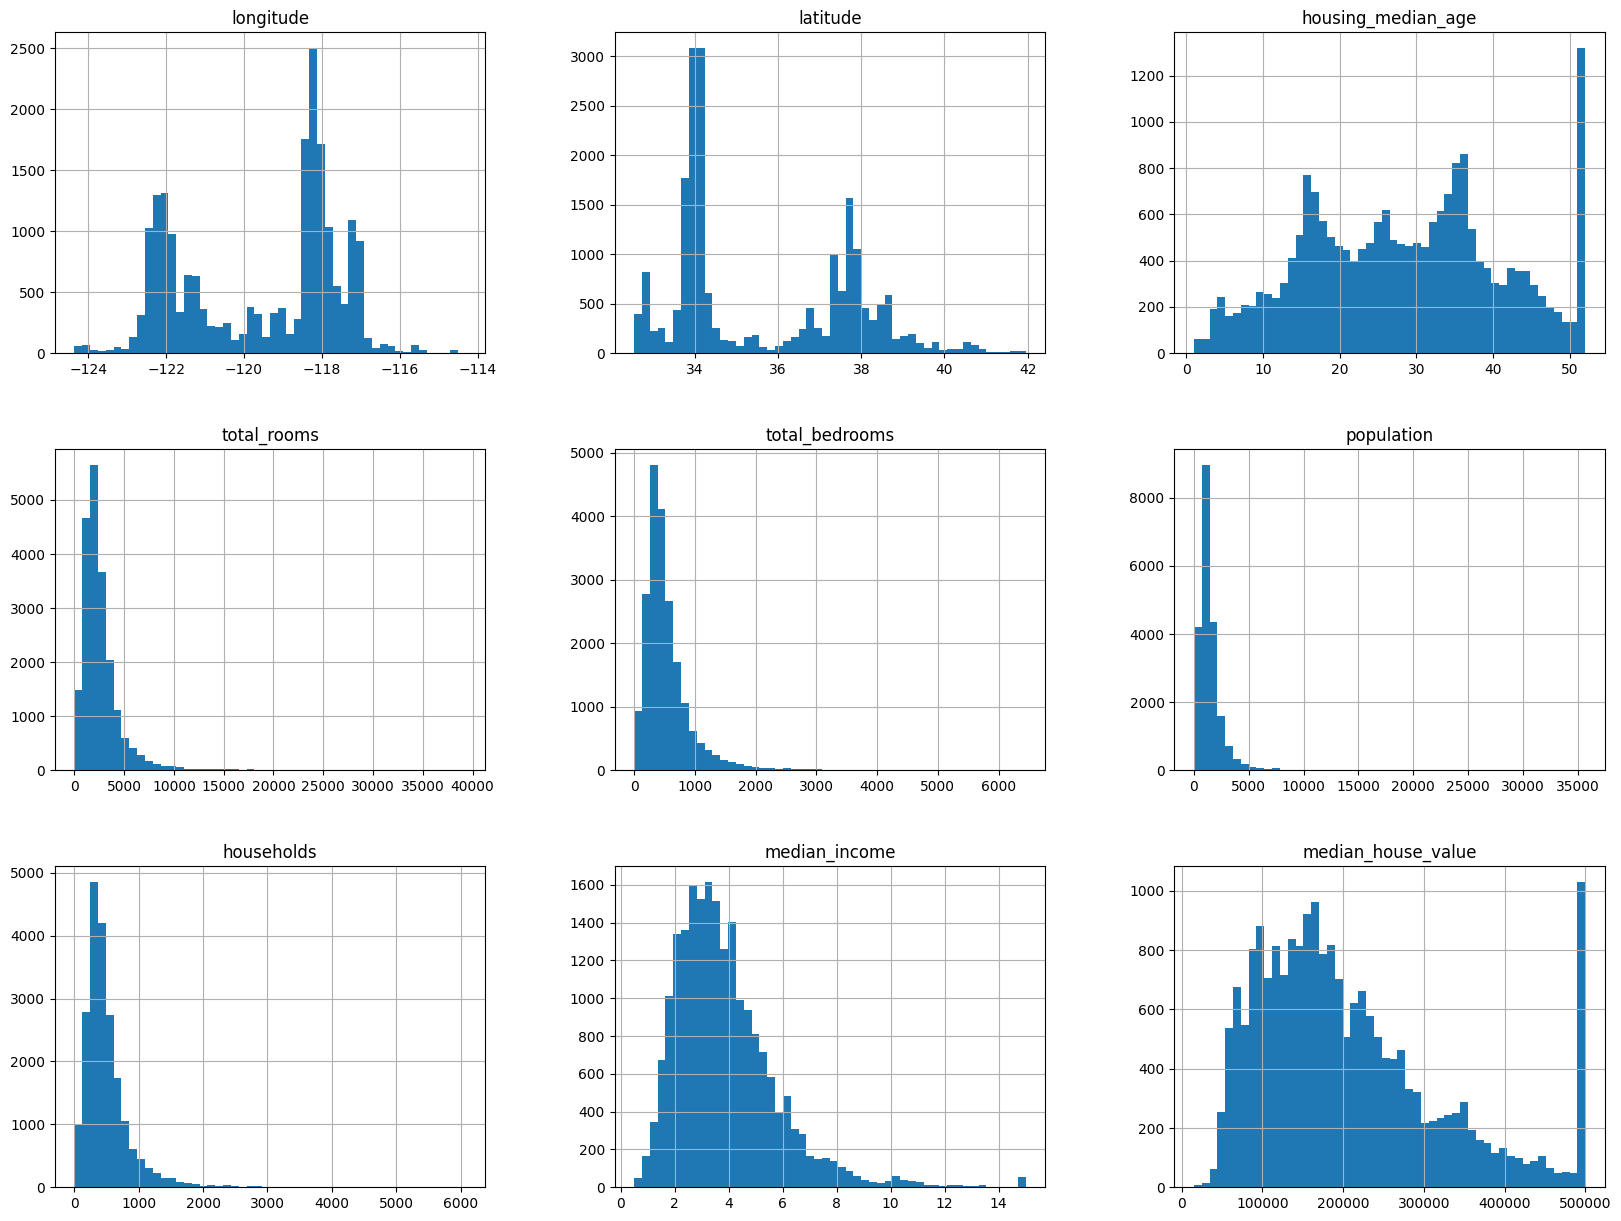

In [4]:
hd.hist(bins=50, figsize=(20,15))
plt.show()

#Each histogram helps understand how values for a feature are distributed.

**Creating a test set**


---


**Data snooping bias** happens when you **accidentally use test data** to make decisions about your model. This makes your model look better than it actually is but hurts real-world performance.  

🔹 **Simple Breakdown:**  
1. **Training Set** → Used to train your model.  
2. **Validation Set** → Used to tune and improve the model.  
3. **Test Set** → Should be **completely untouched** until the final evaluation.  

If you look at the test data while choosing a model, you might unknowingly **fit your model to the test set**, making it perform well only on that data but fail on real-world data.  

🔹 **Why is it bad?**  
- Your model **memorizes patterns** from the test set instead of learning general patterns.  
- The test accuracy will be **too optimistic** and not reflect real-world performance.  

**Solution:** Keep the test set **completely separate** until the final step. 🚀*

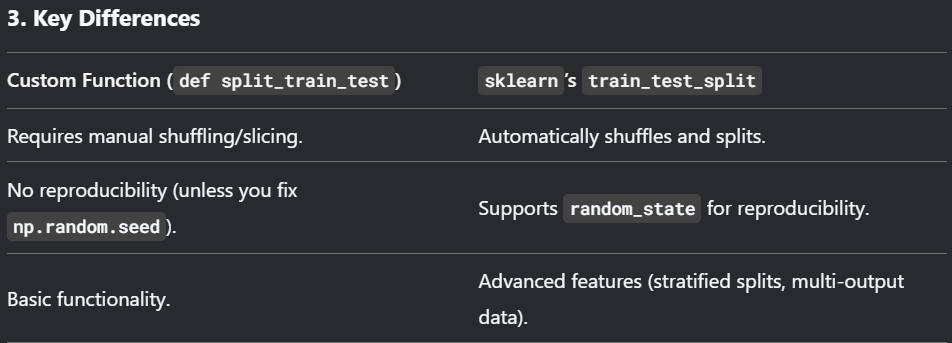

**spliting the data in to 20 and 30%**

In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(hd, test_size=0.2) #20% of data in testset

display(len(train_set))
display(len(test_set))

16512

4128

In [6]:
from sklearn.model_selection import train_test_split

train_set, split_set = train_test_split(hd, test_size= 0.3)  #0% of data in testset
display(len(train_set))
display(len(split_set))


14448

6192

**unique identifier for each sets**

In [7]:
from zlib import crc32
import numpy as np

In [8]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_test_train_by_id(data, test_ratio, id_column):
    ids = data[id_column]

In [10]:
import numpy as np
from zlib import crc32

# Function to check if a row should go to the test set
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# Function to split the data into train and test sets based on an ID column
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


Using stable identifier to ensure the same data always goes to the same set..

# Gaining Insights from data

In [11]:

#Splitting the data into stratified training and test sets
strat_train_set, strat_test_set = train_test_split(hd, test_size=0.2, random_state=42)

#creating a copy of training data
housing = strat_train_set.copy()


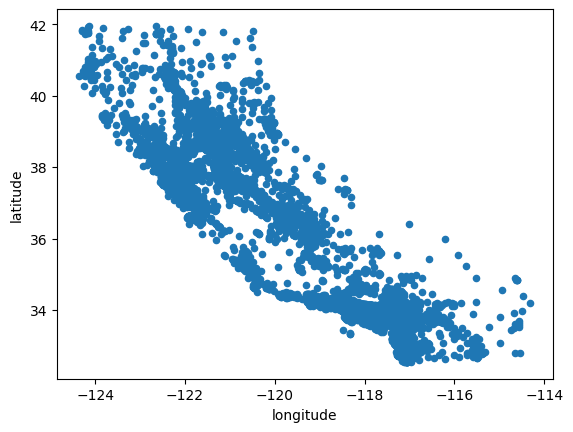

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()


<Axes: xlabel='longitude', ylabel='latitude'>

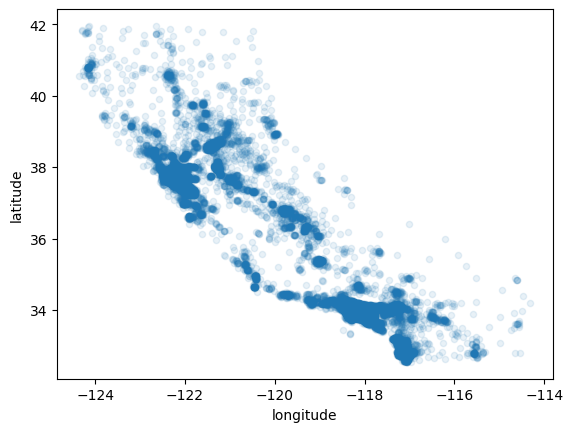

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
#adding alpha func allow us to see the overlapping points clearly


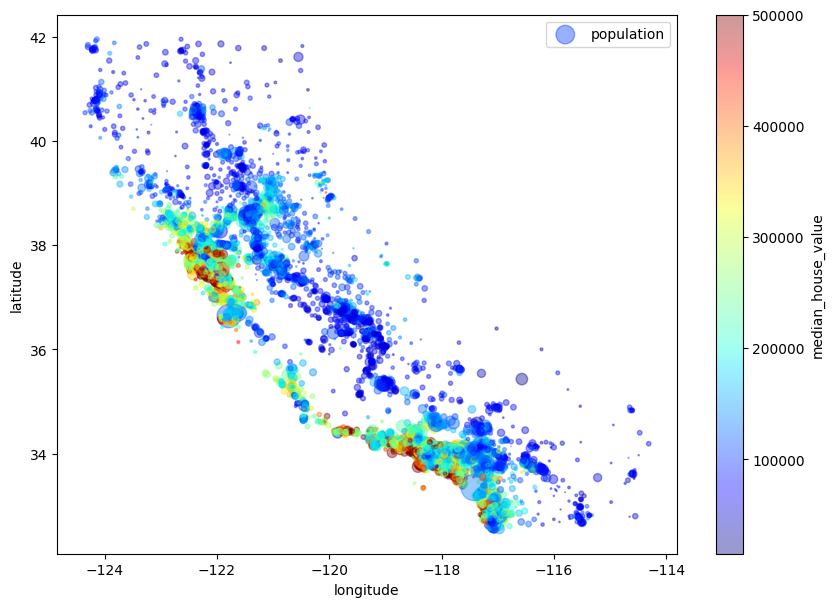

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s = housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend() #visualization for indepth analysis
